# Detección de Rostros usando cascadas de HAAR
La detección de rostros es una tarea casi obvia en los dispositivos modernos pero involucra una serie de conceptos y procesos comunes en proyectos de visión artificial. La tarea de la detección de objetos es, dada una imagen, encontrar la presencia de un objeto y su ubicación dentro de la imagen. En este caso, veremos el ejemplo de la **detección de rostros** usando el algoritmo de las cascadas de HAAR.

## Características de Haar
Se ha determinado que una de las formas más básicas de detección que usan los mecanismos de visión en la naturaleza es la extracción de características básicas en etapas iniciales de la visión para luego pasar a características más complejas, por ejemplo, primero comenzamos a detectar los contornos y los bordes, para luego buscar patrones en un rostro como los ojos o la boca. Las características de HAAR son kernels de convolución que implementan algunas de estas etapas:
![haar](haar_features.jpg)
Para una imagen, existen muchas combinaciones que genera un número intratable de características que procesar y analizar. Algunos de estos kernels son mejores que otros a la hora de detectar la presencia de un rostro, como podemos ver en la ilustración:
![haar2](haar.png)
Para resolver este problema se aplican las características al conjunto de entrenamiento y se extraen las que tengan el mejor rendimiento de clasificación, de esta manera, se genera un conjunto de clasificación con un numero muy reducido de características que calcular.
La clasificación final esta definida por la suma ponderada de los resultados de cada una de estas características.

Otro concepto clave es el de la clasificación en cascada, se propone que en una imagen, la mayor parte de la información no corresponde a un rostro, así que se genera una cascada de clasificadores que descarta partes que no contienen rostros desde las primeras etapas, es así como el procesamiento se centra solamente en los candidatos más fuertes para ser un rostro.
![casc](cascade.png)

## Implementación en Python
Afortunadamente, el algoritmo anteriormente explicado ya ha sido muy bien estudiado y las implementaciones se han optimizado de tal forma que no tendremos que preocuparnos por implementar las características, el entrenamiento o la cascada, OpenCV viene con modelos de cascadas entrenadas para distintas tareas de detección, entre ellos detección de rostros, personas, etc.

In [2]:
# modulos necesarios
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
# importamos el modelo entrenado
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# leemos la imagen
lenna = cv2.imread('familia.jpg')
gray = cv2.cvtColor(lenna, cv2.COLOR_BGR2GRAY)
face_cascade.empty()

False

<type 'numpy.ndarray'>
(34, 4)


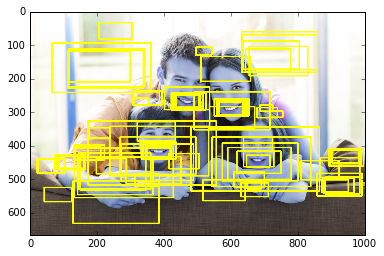

In [18]:
# deteccion de rostros usando las cascadas de haar
faces = face_cascade.detectMultiScale(gray, 1.3,2)
print(type(faces))
print(faces.shape)
# iteramos para cada rostro encontrado
for (x,y,w,h) in faces:
    cv2.rectangle(lenna,(x,y),(x+w,y+h),(255,255,0),4)
plt.imshow(lenna)